In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
%matplotlib inline

In [86]:
df = pd.read_csv('data/DataSet_LakasArak.csv')

In [87]:
df

county             city  postcode property_type  \
0      Budapest    Budapest XII.       NaN          flat   
1      Budapest      Budapest I.    1016.0          flat   
2      Budapest    Budapest XVI.    1164.0          flat   
3      Budapest      Budapest X.       NaN          flat   
4      Budapest  Budapest XVIII.    1181.0          flat   
...         ...              ...       ...           ...   
78534  Budapest     Budapest VI.    1063.0          flat   
78535  Budapest    Budapest III.    1031.0          flat   
78536  Budapest    Budapest XIV.       NaN          flat   
78537  Budapest     Budapest II.    1024.0          flat   
78538  Budapest     Budapest VI.    1061.0          flat   

                          property_subtype property_condition_type  \
0                    brick flat (for sale)                    good   
1                    brick flat (for sale)                   novel   
2                    brick flat (for sale)                   novel   
3                    brick flat (for sale)                    good   
4      prefabricated panel flat (for sale)                 renewed   
...                                    ...                     ...   
78534                brick flat (for sale)         to_be_renovated   
78535  prefabricated panel flat (for sale)            missing_info   
78536                brick flat (for sale)                    good   
78537                brick flat (for sale)                   novel   
78538                brick flat (for sale)                   novel   

      property_floor building_floor_count    view_type orientation  \
0                  1                  NaN  street view         NaN   
1                  2                  NaN  street view         NaN   
2                  1                  NaN  garden view         NaN   
3                  4                  NaN  garden view         NaN   
4                  6                  NaN          NaN         NaN   
...              ...                  ...          ...         ...   
78534              1                  NaN          NaN       south   
78535            NaN                  NaN          NaN         NaN   
78536   ground floor                  NaN          NaN         NaN   
78537       basement                  NaN          NaN        east   
78538              3                    4  street view        east   

      garden_access                        heating_type elevator_type  \
0               NaN                    tile stove (gas)           yes   
1               NaN               konvection gas burner           yes   
2               NaN      central heating with own meter           yes   
3               NaN                     central heating          none   
4               NaN                                 NaN           yes   
...             ...                                 ...           ...   
78534           NaN  gas furnace, circulating hot water          none   
78535           NaN                                 NaN           yes   
78536           NaN               konvection gas burner          none   
78537           NaN  gas furnace, circulating hot water          none   
78538           NaN      central heating with own meter           yes   

       room_cnt  small_room_cnt  created_at  property_area  balcony_area  \
0           2.0             1.0  2015-02-09           65.0           0.0   
1           1.0             1.0  2015-02-09           45.0           0.0   
2           2.0             1.0  2015-02-09           60.0           0.0   
3           2.0             0.0  2015-02-09           55.0           4.0   
4           2.0             1.0  2015-02-09           60.0           3.0   
...         ...             ...         ...            ...           ...   
78534       2.0             0.0  2016-08-29           65.0           0.0   
78535       1.0             0.0  2016-08-29           35.0           0.0   
78536       1.0             0.0  2016-08-29  

In [88]:
def kiertekelo_fuggveny(df, tipp_oszlop_neve, target_oszlop_neve):
    mean_absolute_error=   (abs(df[tipp_oszlop_neve]-df[target_oszlop_neve])).mean()
    
    MAPE=(abs((df[target_oszlop_neve] - df[tipp_oszlop_neve])/df[target_oszlop_neve])).mean()
    rmse =  np.sqrt( ( (df[tipp_oszlop_neve]-df[target_oszlop_neve])**2 ).mean() )
    print("RMSE",rmse)
    print("MAE:",mean_absolute_error)
    print("MAPE:",MAPE)

In [89]:
df['nmAr']=df['price_created_at']*1000000/df['property_area']

In [90]:
# negyzetmeter ar eloszlasa (100 ezres nagyságrend)
df['nmAr'].hist(bins=100)
plt.title('nmAr eloszlasa')
plt.show()

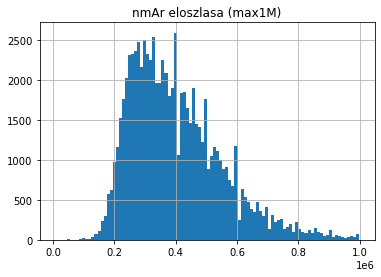

In [91]:
# negyzetmeter ar eloszlasa (100 ezres nagyságrend)
df2=df[df['nmAr']<1000000]
df2['nmAr'].hist(bins=100)
plt.title('nmAr eloszlasa (max1M)')
plt.show()

In [92]:
df.shape

(78539, 23)

In [93]:
def modellezes(df, bemeno_valtozok, celvaltozo):
    train_df=df.iloc[:40000,:].copy()
    test_df =df.iloc[40000:,:].copy()
    
    model=LinearRegression()
    model.fit( train_df[bemeno_valtozok] , train_df[celvaltozo] )
    test_df['tipp']=model.predict( test_df[bemeno_valtozok] )
    return test_df, model

In [94]:
def modellezes(df, bemeno_valtozok, celvaltozo):
    X_train, X_test, y_train, y_test = train_test_split(df[bemeno_valtozok], df[celvaltozo], test_size = 0.5, random_state = 42)    
    model=LinearRegression()
    model.fit(X_train, y_train)
    X_test['tipp']=model.predict(X_test)
    X_test[celvaltozo]=y_test
    
    return X_test, model

# 1. Egyszerű modell

In [95]:
df['small_room_cnt']=df['small_room_cnt'].fillna(0)

In [96]:
bemeno_valtozok = ['room_cnt','small_room_cnt','property_area']
celvaltozo = 'nmAr'

In [97]:
test_df, model = modellezes(df, bemeno_valtozok, celvaltozo)

In [98]:
kiertekelo_fuggveny(test_df,celvaltozo,'tipp')

RMSE 171449.65068664
MAE: 122346.21377887146
MAPE: 0.3015732805586102


In [99]:
model.intercept_

519395.9283530937

In [100]:
pd.DataFrame({"att":bemeno_valtozok,"coef":model.coef_}).sort_values('coef')

att          coef
1  small_room_cnt -12707.568881
2   property_area  -2426.745759
0        room_cnt   8417.180983

Minél kell jobbnak lenni?

In [101]:
test_df['tipp_0']=df['nmAr'].mean()

In [102]:
kiertekelo_fuggveny(test_df,'nmAr','tipp_0')

RMSE 174533.74047535344
MAE: 124466.61413255577
MAPE: 0.3056348267743914


# 2. Adatelőkészítés

Bemenő változóként használjuk a következőket:
* Szobák száma
* Félszobák száma
* Négyzetméter
* Balkon mérete  


Illetve készítsünk dummy változót az alábbi változókból
* Fűtés típusa
* Kerület neve (szóval ne a kerület sorszámát add be bemenetként)
* Lakás állapota

### Hiányzó értékek kezelése

In [103]:
# megnezzuk melyik oszlopoknal mennyi hianyzo ertek van, altalunk hasznaltak kozul csak balcony_areaban van hianyzo ertek
df.isna().sum()

county                         0
city                         559
postcode                   28954
property_type                  0
property_subtype            1659
property_condition_type        0
property_floor              3793
building_floor_count       42110
view_type                  35661
orientation                30892
garden_access              61339
heating_type               11306
elevator_type              14151
room_cnt                       0
small_room_cnt                 0
created_at                     0
property_area                  0
balcony_area                   0
price_created_at               0
ad_view_cnt                    0
active_days                    0
nr                             0
nmAr                           0
dtype: int64

In [104]:
len(df)

78539

In [105]:
df['balcony_area'].describe()

count    78539.000000
mean         1.953182
std          4.677227
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         97.000000
Name: balcony_area, dtype: float64

In [106]:
# erkely kitoltese 0-aval h nincs erkely
df['balcony_area']=df['balcony_area'].fillna(0)

## Kategorikus változókból dummy

In [107]:
# melyik tipusu lakasbol mennyi van
df['property_subtype'].value_counts()

brick flat (for sale)                  57081
prefabricated panel flat (for sale)    19799
Name: property_subtype, dtype: int64

#### 1. Flag változó (ha két értéket vesz fel)

In [108]:
# Nem igazan elegans ! (flag valtozo) mivel ket erteket vehet fel
df['panel_flag']=df['property_subtype'].apply(lambda x: 1 if str(x)[0]=='p' else 0) 

In [109]:
df['panel_flag'].value_counts()

0    58740
1    19799
Name: panel_flag, dtype: int64

In [110]:
#hianyzo ertekek
df['property_subtype'].isna().sum()

1659

#### 2. Számoknak megfeleltetés

In [111]:
df['city'].value_counts()

Budapest XIII.     8567
Budapest XIV.      8434
Budapest XI.       7001
Budapest VII.      6064
Budapest III.      5646
Budapest VIII.     5460
Budapest VI.       4577
Budapest IX.       3877
Budapest IV.       3376
Budapest II.       3274
Budapest XV.       3109
Budapest X.        3049
Budapest V.        2518
Budapest XII.      2140
Budapest XVIII.    1915
Budapest XXI.      1907
Budapest XIX.      1604
Budapest XX.       1595
Budapest I.        1419
Budapest XVII.      955
Budapest XVI.       769
Budapest XXII.      616
Budapest XXIII.     108
Name: city, dtype: int64

In [112]:
df['postcode'].isna().sum()

28954

In [113]:
df['ker_code']=df['postcode'].fillna(1000).apply(lambda x: int(str(x)[1:3]))

In [114]:
stat = df.groupby('city',as_index=False).agg({'ker_code':'max'})  
stat

city  ker_code
0       Budapest I.         1
1      Budapest II.         2
2     Budapest III.         3
3      Budapest IV.         4
4      Budapest IX.         9
5       Budapest V.         5
6      Budapest VI.         6
7     Budapest VII.         7
8    Budapest VIII.         8
9       Budapest X.        19
10     Budapest XI.        11
11    Budapest XII.        12
12   Budapest XIII.        14
13    Budapest XIV.        14
14    Budapest XIX.        19
15     Budapest XV.        15
16    Budapest XVI.        16
17   Budapest XVII.        17
18  Budapest XVIII.        18
19     Budapest XX.        20
20    Budapest XXI.        21
21   Budapest XXII.        22
22  Budapest XXIII.        23

In [115]:
# javitjuk a kerulet hibat kezzel
stat.iloc[9,1]=10
stat.iloc[12,1]=13

In [116]:
stat.columns=['city','kerulet_sorszam']

In [117]:
stat.head()

city  kerulet_sorszam
0    Budapest I.                1
1   Budapest II.                2
2  Budapest III.                3
3   Budapest IV.                4
4   Budapest IX.                9

In [118]:
df=df.merge(stat,on='city',how='left')

In [119]:
df.head()

county             city  postcode property_type  \
0  Budapest    Budapest XII.       NaN          flat   
1  Budapest      Budapest I.    1016.0          flat   
2  Budapest    Budapest XVI.    1164.0          flat   
3  Budapest      Budapest X.       NaN          flat   
4  Budapest  Budapest XVIII.    1181.0          flat   

                      property_subtype property_condition_type property_floor  \
0                brick flat (for sale)                    good              1   
1                brick flat (for sale)                   novel              2   
2                brick flat (for sale)                   novel              1   
3                brick flat (for sale)                    good              4   
4  prefabricated panel flat (for sale)                 renewed              6   

  building_floor_count    view_type orientation garden_access  \
0                  NaN  street view         NaN           NaN   
1                  NaN  street view         NaN           NaN   
2                  NaN  garden view         NaN           NaN   
3                  NaN  garden view         NaN           NaN   
4                  NaN          NaN         NaN           NaN   

                     heating_type elevator_type  room_cnt  small_room_cnt  \
0                tile stove (gas)           yes       2.0             1.0   
1           konvection gas burner           yes       1.0             1.0   
2  central heating with own meter           yes       2.0             1.0   
3                 central heating          none       2.0             0.0   
4                             NaN           yes       2.0             1.0   

   created_at  property_area  balcony_area  price_created_at  ad_view_cnt  \
0  2015-02-09           65.0           0.0              23.5        605.0   
1  2015-02-09           45.0           0.0              20.0         49.0   
2  2015-02-09           60.0           0.0              22.0         77.0   
3  2015-02-09           55.0           4.0              11.0        139.0   
4  2015-02-09           60.0           3.0              10.2        176.0   

   active_days  nr           nmAr  panel_flag  ker_code  kerulet_sorszam  
0        119.0   4  361538.461538           0         0             12.0  
1         25.0  12  444444.444444           0         1              1.0  
2         77.0  14  366666.666667           0        16             16.0  
3         18.0  21  200000.000000           0         0             10.0  
4         69.0  31  170000.000000           1        18             18.0

In [120]:
df['kerulet_sorszam'].isnull().sum()

559

In [121]:
df['kerulet_sorszam']=df['kerulet_sorszam'].fillna(0)

#### Dummyzálás

In [122]:
# lessük meg, hogy mi történt (dummy oszlopok)
pd.set_option('display.max_columns', None)

In [123]:
df.head()

county             city  postcode property_type  \
0  Budapest    Budapest XII.       NaN          flat   
1  Budapest      Budapest I.    1016.0          flat   
2  Budapest    Budapest XVI.    1164.0          flat   
3  Budapest      Budapest X.       NaN          flat   
4  Budapest  Budapest XVIII.    1181.0          flat   

                      property_subtype property_condition_type property_floor  \
0                brick flat (for sale)                    good              1   
1                brick flat (for sale)                   novel              2   
2                brick flat (for sale)                   novel              1   
3                brick flat (for sale)                    good              4   
4  prefabricated panel flat (for sale)                 renewed              6   

  building_floor_count    view_type orientation garden_access  \
0                  NaN  street view         NaN           NaN   
1                  NaN  street view         NaN           NaN   
2                  NaN  garden view         NaN           NaN   
3                  NaN  garden view         NaN           NaN   
4                  NaN          NaN         NaN           NaN   

                     heating_type elevator_type  room_cnt  small_room_cnt  \
0                tile stove (gas)           yes       2.0             1.0   
1           konvection gas burner           yes       1.0             1.0   
2  central heating with own meter           yes       2.0             1.0   
3                 central heating          none       2.0             0.0   
4                             NaN           yes       2.0             1.0   

   created_at  property_area  balcony_area  price_created_at  ad_view_cnt  \
0  2015-02-09           65.0           0.0              23.5        605.0   
1  2015-02-09           45.0           0.0              20.0         49.0   
2  2015-02-09           60.0           0.0              22.0         77.0   
3  2015-02-09           55.0           4.0              11.0        139.0   
4  2015-02-09           60.0           3.0              10.2        176.0   

   active_days  nr           nmAr  panel_flag  ker_code  kerulet_sorszam  
0        119.0   4  361538.461538           0         0             12.0  
1         25.0  12  444444.444444           0         1              1.0  
2         77.0  14  366666.666667           0        16             16.0  
3         18.0  21  200000.000000           0         0             10.0  
4         69.0  31  170000.000000           1        18             18.0

In [124]:
# fűtés típust vegyük hozzá
df['heating_type'].value_counts()

# Binaris valtozokat hozunk letre a nominalis ertekekbol - Dummy 

df['heating_type']=df['heating_type'].fillna('other')

heating_dummies = pd.get_dummies(df['heating_type'], prefix = 'heating_type=', drop_first = True)

df = df.merge(heating_dummies, left_index = True, right_index = True, how = 'left')

In [125]:
df

county             city  postcode property_type  \
0      Budapest    Budapest XII.       NaN          flat   
1      Budapest      Budapest I.    1016.0          flat   
2      Budapest    Budapest XVI.    1164.0          flat   
3      Budapest      Budapest X.       NaN          flat   
4      Budapest  Budapest XVIII.    1181.0          flat   
...         ...              ...       ...           ...   
78534  Budapest     Budapest VI.    1063.0          flat   
78535  Budapest    Budapest III.    1031.0          flat   
78536  Budapest    Budapest XIV.       NaN          flat   
78537  Budapest     Budapest II.    1024.0          flat   
78538  Budapest     Budapest VI.    1061.0          flat   

                          property_subtype property_condition_type  \
0                    brick flat (for sale)                    good   
1                    brick flat (for sale)                   novel   
2                    brick flat (for sale)                   novel   
3                    brick flat (for sale)                    good   
4      prefabricated panel flat (for sale)                 renewed   
...                                    ...                     ...   
78534                brick flat (for sale)         to_be_renovated   
78535  prefabricated panel flat (for sale)            missing_info   
78536                brick flat (for sale)                    good   
78537                brick flat (for sale)                   novel   
78538                brick flat (for sale)                   novel   

      property_floor building_floor_count    view_type orientation  \
0                  1                  NaN  street view         NaN   
1                  2                  NaN  street view         NaN   
2                  1                  NaN  garden view         NaN   
3                  4                  NaN  garden view         NaN   
4                  6                  NaN          NaN         NaN   
...              ...                  ...          ...         ...   
78534              1                  NaN          NaN       south   
78535            NaN                  NaN          NaN         NaN   
78536   ground floor                  NaN          NaN         NaN   
78537       basement                  NaN          NaN        east   
78538              3                    4  street view        east   

      garden_access                        heating_type elevator_type  \
0               NaN                    tile stove (gas)           yes   
1               NaN               konvection gas burner           yes   
2               NaN      central heating with own meter           yes   
3               NaN                     central heating          none   
4               NaN                               other           yes   
...             ...                                 ...           ...   
78534           NaN  gas furnace, circulating hot water          none   
78535           NaN                               other           yes   
78536           NaN               konvection gas burner          none   
78537           NaN  gas furnace, circulating hot water          none   
78538           NaN      central heating with own meter           yes   

       room_cnt  small_room_cnt  created_at  property_area  balcony_area  \
0           2.0             1.0  2015-02-09           65.0           0.0   
1           1.0             1.0  2015-02-09           45.0           0.0   
2           2.0             1.0  2015-02-09           60.0           0.0   
3           2.0             0.0  2015-02-09           55.0           4.0   
4           2.0             1.0  2015-02-09           60.0           3.0   
...         ...             ...         ...            ...           ...   
78534       2.0             0.0  2016-08-29           65.0           0.0   
78535       1.0             0.0  2016-08-29           35.0           0.0   
78536       1.0             0.0  2016-08-29  

# 3. Modellezés

In [126]:
bemeno_valtozok=['panel_flag','balcony_area','small_room_cnt','room_cnt','property_area','kerulet_sorszam']

In [127]:
# heating dummy oszlopok hozzáadása
bemeno_valtozok = bemeno_valtozok + heating_dummies.columns.tolist()

In [128]:
bemeno_valtozok

['panel_flag',
 'balcony_area',
 'small_room_cnt',
 'room_cnt',
 'property_area',
 'kerulet_sorszam',
 'heating_type=_central heating with own meter',
 'heating_type=_district heating',
 'heating_type=_electric',
 'heating_type=_fan-coil',
 'heating_type=_gas furnace',
 'heating_type=_gas furnace, circulating hot water',
 'heating_type=_konvection gas burner',
 'heating_type=_other',
 'heating_type=_tile stove (gas)']

In [129]:
test_df2, model2 = modellezes(df, bemeno_valtozok, celvaltozo)

In [130]:
kiertekelo_fuggveny(test_df2,celvaltozo,'tipp')

RMSE 145858.1134983899
MAE: 96653.19387620651
MAPE: 0.23348170171055296


In [131]:
#íme a regressziós modellünk paraméterei
pd.DataFrame({"att":bemeno_valtozok,"coef":model2.coef_}).sort_values('coef')

att           coef
0                                         panel_flag -129816.573534
12               heating_type=_konvection gas burner -112025.765445
14                    heating_type=_tile stove (gas)  -97617.833117
7                     heating_type=_district heating  -61868.864888
10                         heating_type=_gas furnace  -59857.513014
13                               heating_type=_other  -50714.384048
8                             heating_type=_electric  -45575.082069
5                                    kerulet_sorszam   -9020.374007
11  heating_type=_gas furnace, circulating hot water   -8639.309834
4                                      property_area   -3513.661007
1                                       balcony_area    3797.299054
6       heating_type=_central heating with own meter   12839.948681
2                                     small_room_cnt   13675.646714
3                                           room_cnt   24355.361089
9                             heating_type=_fan-coil  152939.671950

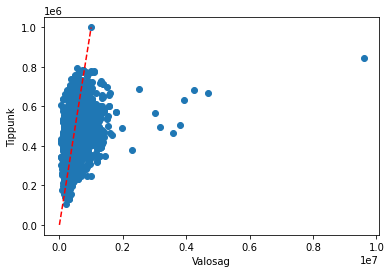

In [132]:
plt.scatter(test_df2[celvaltozo],test_df2['tipp'])
plt.xlabel("Valosag")
plt.ylabel("Tippunk")
plt.plot([0,1000000],[0,1000000],'r--')
plt.show()

# ÓRAI FOLYTATÁS

## Kerület - Mint dummy változó 

In [133]:
uj_valtozok=[]
for i in df['kerulet_sorszam'].unique():
    def f(x):
        if x==i:
            return 1
        else:
            return 0
    ujnev=f'kerulet_{i}'
    df[ujnev]=df['kerulet_sorszam'].apply(f)
    uj_valtozok.append(ujnev)

In [134]:
bemeno_valtozok.remove('kerulet_sorszam')

In [135]:
bemeno_valtozok = bemeno_valtozok + uj_valtozok[:-1]

In [136]:
test_df,model = modellezes(df,bemeno_valtozok,celvaltozo)
kiertekelo_fuggveny(test_df,'tipp',celvaltozo)

RMSE 126048.06327020339
MAE: 77580.4829858961
MAPE: 0.199411766346528


In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [138]:
model_dt=DecisionTreeRegressor(max_depth=5,random_state=42)
model_forest = RandomForestRegressor(random_state=42, max_depth=5,
                                     n_estimators=100)
model_gbm = GradientBoostingRegressor(random_state=42, max_depth=5,
                                     n_estimators=100)

In [139]:
def modellezes2(model,df, bemeno_valtozok, celvaltozo):
    X_train, X_test, y_train, y_test = train_test_split(df[bemeno_valtozok], df[celvaltozo], test_size = 0.5, random_state = 42)    
    #model=LinearRegression()
    model.fit(X_train, y_train)
    X_test['tipp']=model.predict(X_test)
    X_test[celvaltozo]=y_test
    return X_test

In [140]:
for m in [model_dt,model_forest,model_gbm]:
    test_df = modellezes2(m,df,bemeno_valtozok,celvaltozo)
    print(str(m)[:20])
    kiertekelo_fuggveny(test_df,'tipp',celvaltozo)

DecisionTreeRegresso
RMSE 143901.76278255766
MAE: 94937.27451809068
MAPE: 0.254723130083225
RandomForestRegresso
RMSE 141177.29041123195
MAE: 93255.5805997189
MAPE: 0.2505163560616102
GradientBoostingRegr
RMSE 117729.13371058494
MAE: 73286.23491641237
MAPE: 0.18817841335581706


In [141]:
model_gbm.feature_importances_

array([0.23524985, 0.04854467, 0.01941382, 0.02005443, 0.144874  ,
       0.02431092, 0.00607816, 0.00234526, 0.0037757 , 0.        ,
       0.01324417, 0.04870041, 0.01303722, 0.0031446 , 0.0103949 ,
       0.02025194, 0.00266331, 0.02210823, 0.01443111, 0.01800187,
       0.00547956, 0.00903386, 0.00483326, 0.0209528 , 0.02477773,
       0.01247387, 0.00469675, 0.14408084, 0.03738086, 0.00609246,
       0.00627858, 0.00612649, 0.00393138, 0.02756428, 0.01468539,
       0.        , 0.00098731])

## Kerulet - Keruleti atlagar a __tanito adatokon__

In [142]:
bemeno_valtozok=bemeno_valtozok[:14]
df['city']=df['city'].fillna("Kerulet 0.")
train_df, test_df = train_test_split(df,test_size=0.5,random_state=42)

In [143]:
stat = train_df.groupby("city",as_index=False).agg({celvaltozo:'mean'})
stat.columns=['city','atlag_nmAr']
df=df.merge(stat,on='city',how='left')

In [144]:
bemeno_valtozok.append("atlag_nmAr")

In [145]:
model_linreg=LinearRegression()

In [146]:
for m in [model_linreg,model_dt,model_forest,model_gbm]:
    test_df = modellezes2(m,df,bemeno_valtozok,celvaltozo)
    print("\n",str(m)[:20])
    kiertekelo_fuggveny(test_df,'tipp',celvaltozo)


 LinearRegression()
RMSE 126632.69784756374
MAE: 78394.32719894363
MAPE: 0.20185682738060734

 DecisionTreeRegresso
RMSE 135005.94949520595
MAE: 82431.6539551091
MAPE: 0.21172077442110557

 RandomForestRegresso
RMSE 129151.88251747067
MAE: 80606.57026688215
MAPE: 0.20789474863063886

 GradientBoostingRegr
RMSE 116277.25634857052
MAE: 71562.65522987362
MAPE: 0.1818125912993226


## Keruleti atlagar de nelkulem

In [147]:
bemeno_valtozok=bemeno_valtozok[:14]
df['city']=df['city'].fillna("Kerulet 0.")
#train_df, test_df = train_test_split(df,test_size=0.5,random_state=42)

In [148]:
stat = train_df.groupby("city",as_index=False).agg({celvaltozo:
                                                    ['sum','count','mean']})

In [149]:
stat.columns=['city','kerulet_sum','keruleti_darab','keruleti_atlag']

In [150]:
df=df.merge(stat,on='city',how='left')

# Keresztvalidáció

In [67]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [68]:
# korabban megirt MAPE fg.-t masoljuk
# hiba minel kisebb annal jobb, greater is better = False
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better = False)

In [69]:
model = LinearRegression()

In [70]:
# k-fold = 5 tehat 5 reszre osztja
scores = cross_validate(model, df[bemeno_valtozok], df[celvaltozo], cv = 5, scoring = mape_scorer)

In [71]:
scores

{'fit_time': array([0.04262662, 0.03877902, 0.03969002, 0.03918934, 0.0555613 ]),
 'score_time': array([0.01218414, 0.00386977, 0.00392389, 0.00393844, 0.00407839]),
 'test_score': array([-0.31897084, -0.2200198 , -0.18947914, -0.16797975, -0.17717915])}

In [72]:
# atlagosan 20 %-os hiba
np.mean(scores['test_score'])

-0.2147257368785648